# AB Testing

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
# import datasets
cntrl = pd.read_csv('control_group.csv', delimiter=';')
test = pd.read_csv('test_group.csv', delimiter=';')

In [ ]:
cntrl.head()

In [ ]:
test.head()

In [3]:
# Customize column names
cntrl.columns = ['campaign', 'date', 'usd_spent', 'impressions', 'reach', 'num_clicks', 'num_searches', 'num_content_views', 'num_added_to_cart',
                'num_purchases']
test.columns = cntrl.columns

In [4]:
dfs = [cntrl, test]
for df in dfs:
    df['date'] = df['date'].str.replace('.', '-')
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
    

In [5]:
# Change date to index for visualization
cntrl.set_index('date', inplace=True)
test.set_index('date', inplace=True)

In [6]:
cntrl.head()

,campaign,usd_spent,impressions,reach,num_clicks,num_searches,num_content_views,num_added_to_cart,num_purchases
date,,,,,,,,,
2019-08-01,Control Campaign,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
2019-08-02,Control Campaign,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2019-08-03,Control Campaign,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
2019-08-04,Control Campaign,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
2019-08-05,Control Campaign,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


feature            cntrl_mean  test_mean   cntrl_sd    test_sd      

usd_spent          2288.433    367.334     2563.067    348.688     
impressions        108940.333  21580.06    74584.8     32121.377   
reach              88370.65    21609.338   53491.567   28795.776   
num_clicks         5261.65     1756.926    6032.333    1708.567    
num_searches       2193.117    864.923     2418.967    388.742     
num_content_views  1916.183    778.844     1858.0      597.655     
num_added_to_cart  1289.45     404.52      881.533     347.584     
num_purchases      523.767     181.889     521.233     211.048     




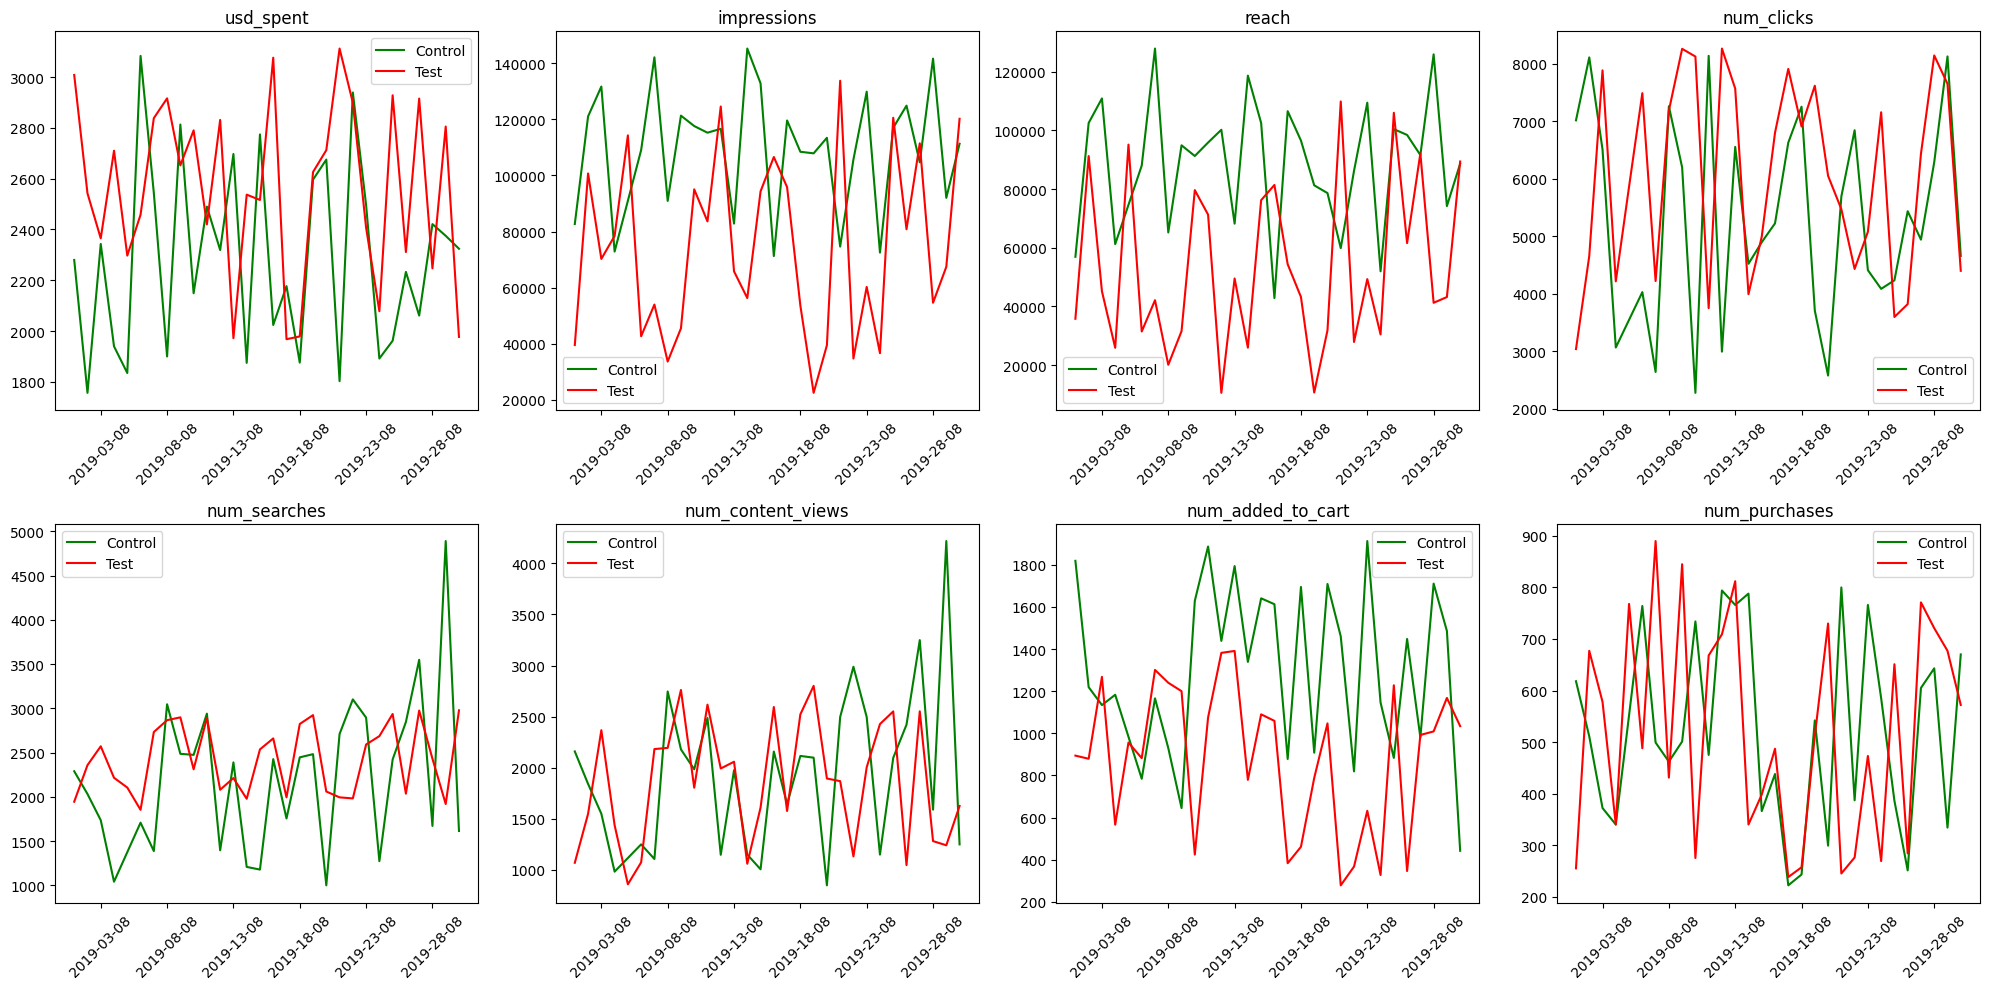

In [41]:

def print_header():
    # Create header for tabular output
    print(f"{'feature':<19}{'cntrl_mean':<12}{'test_mean':<12}{'cntrl_sd':<12}{'test_sd':<12}", '\n')

def print_stats(feature, stat1, stat2, stat3, stat4):
     print(f'{feature :<19}{stat1 :<12}{stat2:<12}{stat3:<12}{stat4:<12}')

def line_plot(x, *args, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    return ax.plot(x, *args, **kwargs)

def subplots(plot):

    fig, axes = plt.subplots(2, 4, figsize=(20, 10)) 
    features = cntrl.columns[1:]
  
    print_header()
    
    for i, feature in enumerate(features):   

        cntrl_mean = cntrl[feature].mean().round(3)
        cntrl_sd = cntrl[feature].std().round(3)
        test_mean = test[feature].mean().round(3)
        test_sd = test[feature].std().round(3)
        
        print_stats(feature, cntrl_mean, cntrl_sd, test_mean, test_sd)
        
        ax = axes[i // axes.shape[1], i % axes.shape[1]]  # Calculate index position of current element in a flattened 1d-array
        plot(cntrl[feature], color='green', label='Control', ax=ax)
        plot(test[feature], color='red', label='Test', ax=ax)

        if plot != hist_plot:
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=5)) # Syntax is used in combo with dates
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%d-%m')) # Syntax is used in combo with dates
        
        ax.tick_params(axis='x', rotation=45)
        
        ax.set_title(feature)
        ax.legend()
        
      
    print('\n')
    plt.tight_layout()
    plt.show()

subplots(line_plot)


In [11]:
cntrl[cntrl['impressions'].isnull()]

,campaign,usd_spent,impressions,reach,num_clicks,num_searches,num_content_views,num_added_to_cart,num_purchases
date,,,,,,,,,
2019-08-05,Control Campaign,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Test for nulls in 'cntrl' df, then count
cntrl.isnull().sum()

campaign             0
usd_spent            0
impressions          1
reach                1
num_clicks           1
num_searches         1
num_content_views    1
num_added_to_cart    1
num_purchases        1
dtype: int64

In [10]:
# Test for nulls in 'test' df, then count
test.isnull().sum()

campaign             0
usd_spent            0
impressions          0
reach                0
num_clicks           0
num_searches         0
num_content_views    0
num_added_to_cart    0
num_purchases        0
dtype: int64

In [12]:
# Interpolate the missing values in 'cntrl' df
cntrl = cntrl.infer_objects(copy=False)
cntrl = cntrl.interpolate(method='linear')
cntrl.isnull().sum()

/tmp/ipykernel_402/533495614.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  cntrl = cntrl.interpolate(method='linear')


campaign             0
usd_spent            0
impressions          0
reach                0
num_clicks           0
num_searches         0
num_content_views    0
num_added_to_cart    0
num_purchases        0
dtype: int64

feature            cntrl_mean  test_mean   cntrl_sd    test_sd      

usd_spent          2288.43     367.33      2563.07     348.69      
impressions        108940.33   21580.06    74584.8     32121.38    
reach              88370.65    21609.34    53491.57    28795.78    
num_clicks         5261.65     1756.93     6032.33     1708.57     
num_searches       2193.12     864.92      2418.97     388.74      
num_content_views  1916.18     778.84      1858.0      597.65      
num_added_to_cart  1289.45     404.52      881.53      347.58      
num_purchases      523.77      181.89      521.23      211.05      




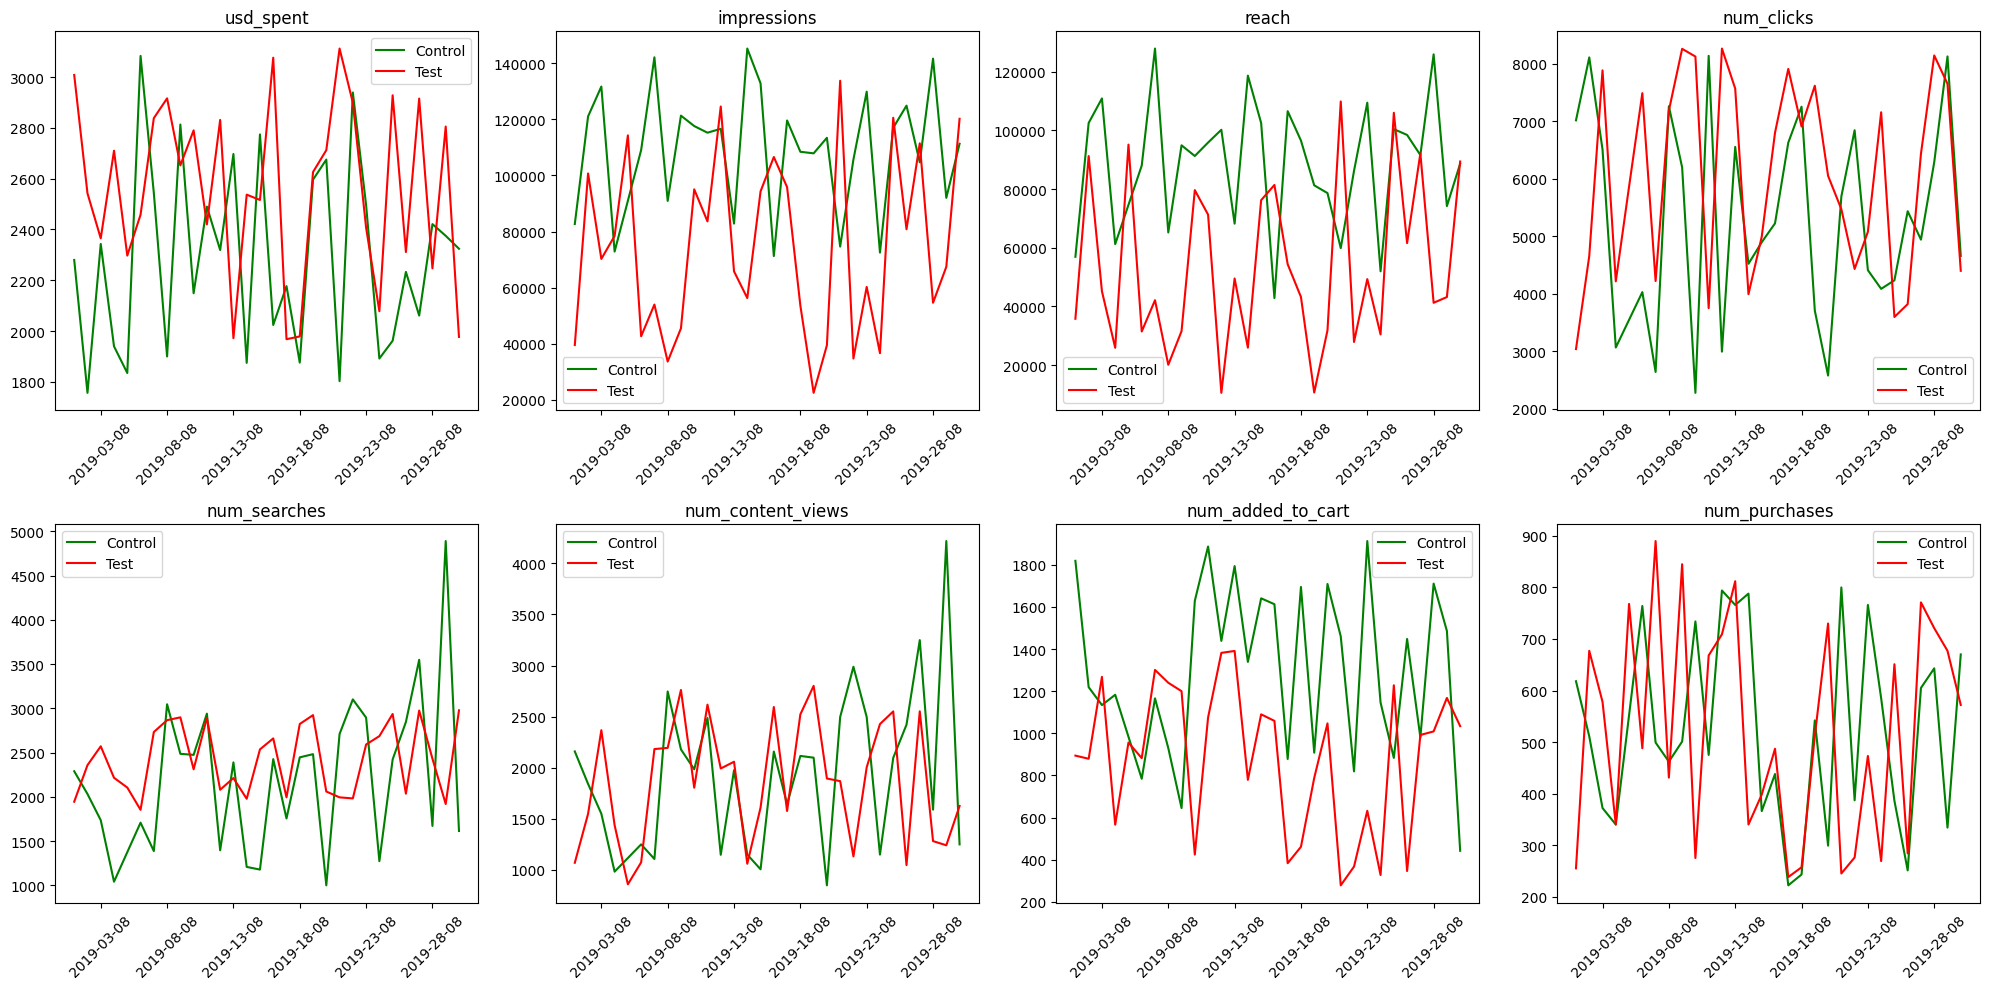

In [13]:
master_plot()

feature            cntrl_mean  test_mean   cntrl_sd    test_sd      

usd_spent          2288.433    367.334     2563.067    348.688     
impressions        108940.333  21580.06    74584.8     32121.377   
reach              88370.65    21609.338   53491.567   28795.776   
num_clicks         5261.65     1756.926    6032.333    1708.567    
num_searches       2193.117    864.923     2418.967    388.742     
num_content_views  1916.183    778.844     1858.0      597.655     
num_added_to_cart  1289.45     404.52      881.533     347.584     
num_purchases      523.767     181.889     521.233     211.048     




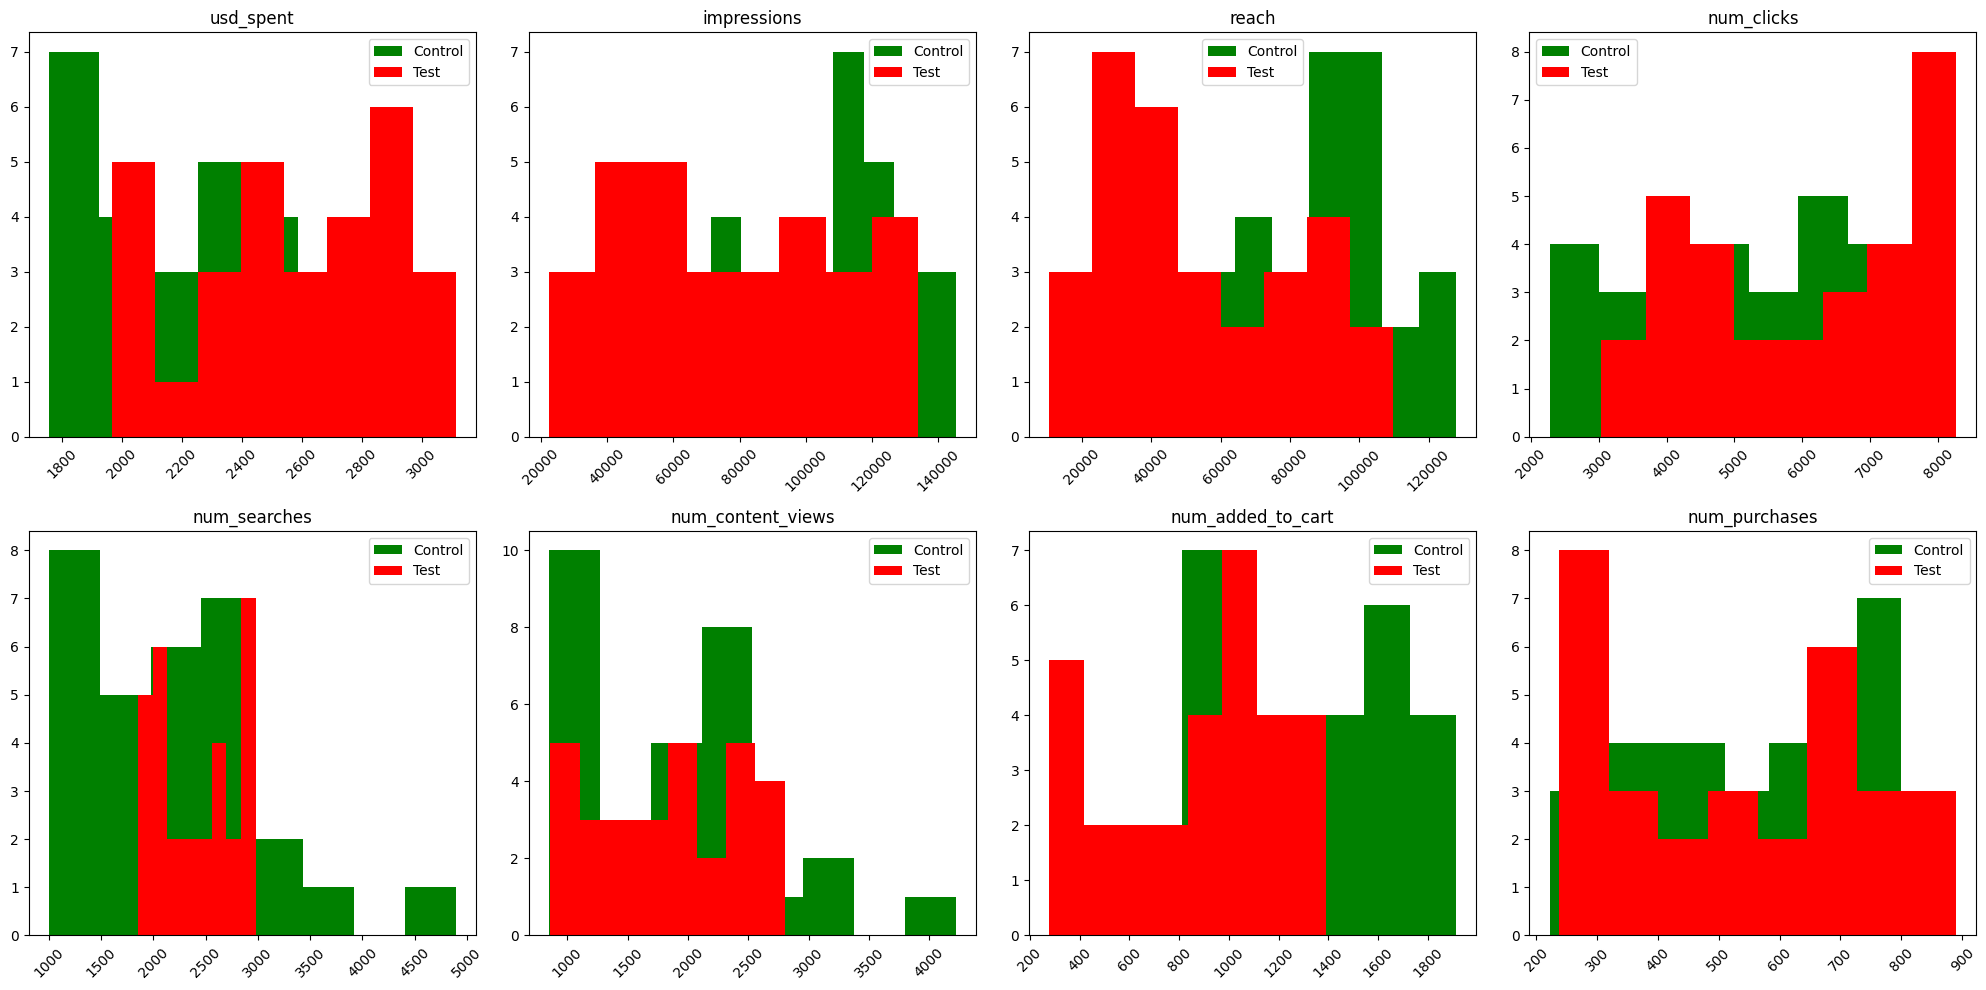

In [44]:
def hist_plot(x, *args, ax=None, bins=8, **kwargs):
    if ax is None:
        ax = plt.gca()
    return ax.hist(x, bins=bins, *args, **kwargs)

subplots(hist_plot)

## Check Normality Assumption

In [59]:
from scipy.stats import shapiro

# H0: data is normal
# Ha: data is not normal

# Iterate over each feature
for i, feature in enumerate(zip(cntrl.columns, test.columns)):
    if feature[0] != 'campaign' and feature[1] != 'campaign':
        cntrl_stat, cntrl_p = shapiro(cntrl[feature[0]])
        test_stat, test_p = shapiro(test[feature[1]])

        # Print formatted output
        print(f"\nFeature: {feature[0]}")
        print(f"  Control Group - Shapiro-Wilk Test: Statistic = {round(cntrl_stat, 2)}, p-value = {round(cntrl_p, 3)}")
        print(f"  Test Group    - Shapiro-Wilk Test: Statistic = {round(test_stat, 2)}, p-value = {round(test_p, 3)}")


Feature: usd_spent
  Control Group - Shapiro-Wilk Test: Statistic = 0.96, p-value = 0.231
  Test Group    - Shapiro-Wilk Test: Statistic = 0.94, p-value = 0.117

Feature: impressions
  Control Group - Shapiro-Wilk Test: Statistic = 0.95, p-value = 0.166
  Test Group    - Shapiro-Wilk Test: Statistic = 0.95, p-value = 0.154

Feature: reach
  Control Group - Shapiro-Wilk Test: Statistic = 0.98, p-value = 0.797
  Test Group    - Shapiro-Wilk Test: Statistic = 0.93, p-value = 0.057

Feature: num_clicks
  Control Group - Shapiro-Wilk Test: Statistic = 0.96, p-value = 0.285
  Test Group    - Shapiro-Wilk Test: Statistic = 0.91, p-value = 0.012

Feature: num_searches
  Control Group - Shapiro-Wilk Test: Statistic = 0.92, p-value = 0.034
  Test Group    - Shapiro-Wilk Test: Statistic = 0.9, p-value = 0.007

Feature: num_content_views
  Control Group - Shapiro-Wilk Test: Statistic = 0.93, p-value = 0.041
  Test Group    - Shapiro-Wilk Test: Statistic = 0.94, p-value = 0.093

Feature: num_added

## Perform ANOVA

In [63]:
from scipy.stats import f_oneway

# Iterate over each feature
for feature in cntrl.columns[1:]:
    cntrl_data = cntrl[feature]  # Data for control group
    test_data = test[feature]    # Data for test group
    
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(cntrl_data, test_data)
    
    # Interpret results
    print(f"Feature: {feature}")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    
    if p_value < 0.05:
        print("Reject the null hypothesis: Significant difference in means between control and test groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in means between control and test groups.")
    print()
    
    

Feature: usd_spent
F-statistic: 8.820849608472042
p-value: 0.004326251207113213
Reject the null hypothesis: Significant difference in means between control and test groups.

Feature: impressions
F-statistic: 23.645748602765543
p-value: 9.215324179245684e-06
Reject the null hypothesis: Significant difference in means between control and test groups.

Feature: reach
F-statistic: 28.15740942744557
p-value: 1.8335386805615746e-06
Reject the null hypothesis: Significant difference in means between control and test groups.

Feature: num_clicks
F-statistic: 2.966801935395797
p-value: 0.09031867205723906
Fail to reject the null hypothesis: No significant difference in means between control and test groups.

Feature: num_searches
F-statistic: 1.70176408482904
p-value: 0.19721023077504407
Fail to reject the null hypothesis: No significant difference in means between control and test groups.

Feature: num_content_views
F-statistic: 0.10537467154891916
p-value: 0.7466406539851316
Fail to reject th

In [75]:
from itertools import combinations
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for cols1 in cntrl.columns[1:-1]:
    for cols2 in test.columns[1:-1]:
        # Perform Tukey's HSD test
        tukey_results = pairwise_tukeyhsd(endog=cntrl[cols1], groups=test[cols2])
        print(tukey_results)
    

/home/moose/.pyenv/pyenv/versions/3.10.13/envs/ab.testing/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/moose/.pyenv/pyenv/versions/3.10.13/envs/ab.testing/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
  1968   1972    520.0   nan   nan   nan  False
  1968   1977    147.0   nan   nan   nan  False
  1968   1979   -301.0   nan   nan   nan  False
  1968   2078   -285.0   nan   nan   nan  False
  1968   2247    244.0   nan   nan   nan  False
  1968   2297   -342.0   nan   nan   nan  False
  1968   2311     56.0   nan   nan   nan  False
  1968   2365    166.0   nan   nan   nan  False
  1968   2407    319.0   nan   nan   nan  False
  1968   2420    313.0   nan   nan   nan  False
  1968   2458    906.0   nan   nan   nan  False
  1968   2516    597.0   nan   nan   nan  False
  1968   2537   -302.0   nan   nan   nan  False
  1968   2542   -420.0   nan   nan   nan  False
  1968   2626    419.0   nan   nan   nan  False
  1968   2652    636.0   nan   nan   nan  False
  1968   2710   -237.0   nan   nan   nan  False
  1968   2712    498.0   nan   nan  

In [71]:
combined_data.columns[1:-1]

Index(['usd_spent', 'impressions', 'reach', 'num_clicks', 'num_searches',
       'num_content_views', 'num_added_to_cart', 'num_purchases'],
      dtype='object')

In [72]:
for name in combined_data.columns[1:-1]:
    print(name)

usd_spent
impressions
reach
num_clicks
num_searches
num_content_views
num_added_to_cart
num_purchases
